Adding Maintenance to System of Sensed Components

In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

In [2]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.6, 0.4, 0, 0],
                [0.2, 0.5, 0.3, 0],
                [0.1, 0.1, 0.2, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(states, high_rel_mat, sensor_states, sensor_mat, 3, 'High_Reliability_Component')
sc2 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_1')
sc3 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_2')

Time step: 0
Corrective maintenance performed.
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Corrective maintenance performed.
Time step: 5
Corrective maintenance performed.
Time step: 6
Time step: 7
Time step: 8
Corrective maintenance performed.
Time step: 9
Time step: 10
Periodic maintenance performed.
Time step: 11
Time step: 12
Time step: 13
Time step: 14


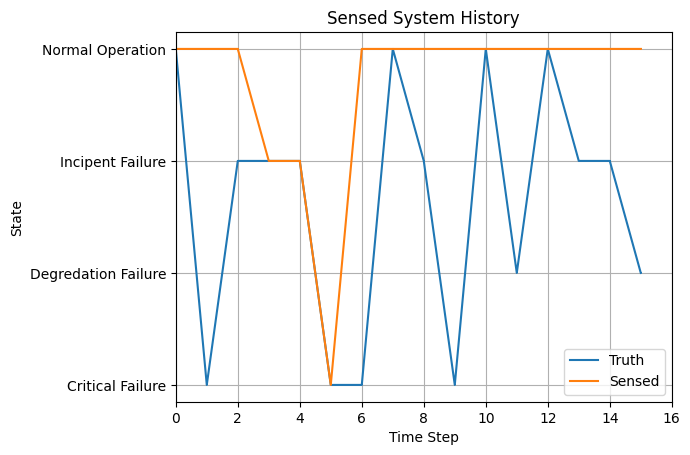

In [3]:
from shipClass.System import System
from shipClass.Maintenance import periodicMaintenance as PM
from shipClass.Maintenance import correctiveMaintenance as CM

import numpy as np

# create a system from the sensed components
sensed_components = [sc1, sc2, sc3]
sys = System('test_system', sensed_components)

# add a periodic maintenance policy to the system
maintenance_interval = 5    # this policy will perform preventive maintenance every 5 time steps

# simulate the system for n time steps, upon failure repair the system
n = 15
for i in range(n):
    # print the time step
    print('Time step:', i)

    # simulate the system for one time step
    sys.simulate()

    # perform corrective maintenance if any component is in a critical state
    if sys.failureCheck():
        CM(sys)
        print('Corrective maintenance performed.')

    # perform preventive maintenance if the time step is a multiple of the maintenance interval
    elif np.mod(i, maintenance_interval) == 0 and i != 0:
        PM(sys)
        print('Periodic maintenance performed.')

sys.plotHistory()

Adding Maintenance to Sensed Component

In [4]:
# testing sensedComponent with maintenance
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp
from Maintainer import Maintainer

import numpy as np

# initialize a sensed component
comp_states={0: 'Working', 1: 'Broken'}
comp_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
c1 = Component("comp1", comp_states, comp_transition_matrix)
sensor_states={0: 'Working', 1: 'Broken'}
sensor_transition_matrix = np.array([[0.75, 0.25], [0, 1]])
s1 = Sensor("sensor1", sensor_states, sensor_transition_matrix)
sc1 = SensedComp(c1, s1)

# initialize a maintainer
maint_man = Maintainer()

# simulate the sensed component for n steps
num_steps = 100
while len(sc1.history) < num_steps:
    sc1.simulate(1)                 # simulate the markov chain
    sc1 = maint_man.diagnose(sc1)   # check if the part needs repair

    sc1 = maint_man.preventive_maintaince(sc1) # perform preventative maintenance if its scheduled

sc1.plotHistory()


ModuleNotFoundError: No module named 'Maintainer'